<a href="https://colab.research.google.com/github/dkalenov/ML-Trading/blob/3_reinforcement/PPO_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Resources

PPO Code adapted from https://www.youtube.com/watch?v=hlv79rcHws0 (Machine Learning with Phil)

### ENVIRONMENT

Let's generate data on which the PPO (Proximal Policy Optimization) reinforcement learning algorithm will be trained.

After creating a DataFrame with a sinusoidal time series and percentage price change, this DataFrame can be used to train a PPO algorithm based on time data. This approach allows us to examine how the PPO algorithm copes with trading on an artificial time series and evaluate its performance.

In [1]:
import numpy as np
import pandas as pd

# Create timesteps
time = np.arange(0, 50, 0.1)

# Assign amplitude and normalise above 0
amplitude = np.sin(time)
amplitude = amplitude + 1
max_amp = max(amplitude)
amplitude = amplitude / max_amp

# Construct DataFrame
df = pd.DataFrame(amplitude)
df.columns = ["Close"]
df["Close_Rt"] = df["Close"].pct_change()
df = df.replace(np.inf, np.nan)
df = df.dropna()
df = df.reset_index(drop=True)

# Show DataFrame and Values
print(f"length : {len(df)}")
print("Min Close: ", df["Close"].min())
print("Max Close: ", df["Close"].max())
df.head()

length : 499
Min Close:  4.896739968063352e-06
Max Close:  1.0


,Close,Close_Rt
0,0.549918,0.099833
1,0.599337,0.089864
2,0.647762,0.080799
3,0.694711,0.072479
4,0.739715,0.064780


<Axes: >

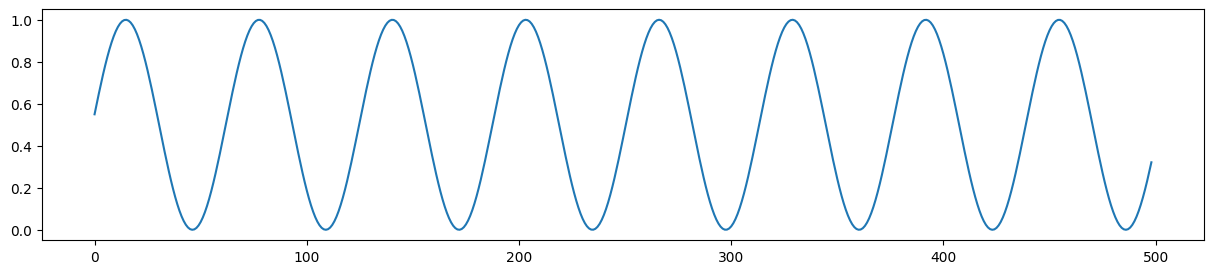

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)
df["Close"].plot()

In [3]:
import gym
from gym import spaces # use Gym 0.24.0 from pip install
import numpy as np
import random
import torch


# Initialise variables
MAX_INT = 2147483647  # Maximum integer value
MAX_OPEN_POSITIONS = 1  # Maximum number of open positions allowed
INITIAL_ACCOUNT_BALANCE = 1000  # Initial account balance
PERCENT_CAPITAL = 0.1  # Percentage of capital to be invested per trade
TRADING_COSTS_RATE = 0.001  # Trading costs rate (e.g., commission or fees)
KILL_THRESH = 0.4  # Threshold for balance preservation (e.g., percentage of initial balance)